In [2]:
!sudo apt-get install -y fonts-nanum

!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#한글폰트 다운로드

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
!pip install folium

In [1]:
import pandas as pd
import numpy as np
import re
import folium

import matplotlib.pyplot as plt
import seaborn as sns
from folium.plugins import BeautifyIcon

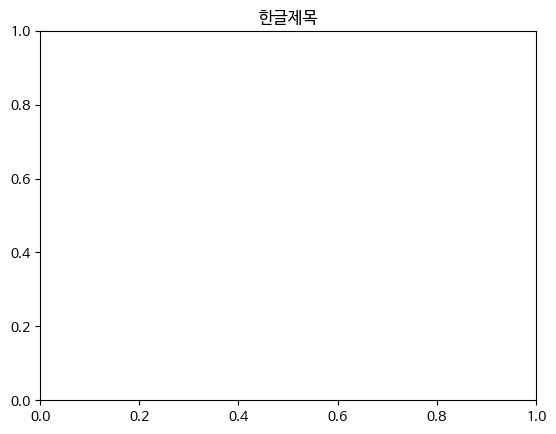

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', family='NanumBarunGothic')
# 폰트 불러오기

plt.title('한글제목')
plt.show()
# 폰트 확인

In [3]:
# Pandas 디스플레이 옵션 설정
pd.set_option('display.max_columns', None)  # 모든 열 보이기
pd.set_option('display.max_rows', None)     # 모든 행 보이기
pd.set_option('display.width', 1000)        # 출력 너비 설정
pd.set_option('display.max_colwidth', None) # 열의 최대 너비 설정

In [4]:
%cd /content/drive/MyDrive/final_project/data/final_dataset

/content/drive/MyDrive/final_project/data/final_dataset


In [5]:
total_data = pd.read_csv('total_data_v5.csv', encoding = 'cp949')
industry = pd.read_csv('/content/drive/MyDrive/final_project/data/산업단지.csv', encoding = 'cp949')
business = pd.read_excel('/content/drive/MyDrive/final_project/data/final_dataset/중심업무지구.xlsx')

<ipython-input-5-873444cb9271>:1: DtypeWarning: Columns (10,11,19,20,22,23,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  total_data = pd.read_csv('total_data_v5.csv', encoding = 'cp949')


In [ ]:
total_data.head()

,아파트명,법정동주소,도로명주소,latitude,longitude,세대수,최고층,용적률,건폐율,전용율,방수,욕실수,현관구조,초등학교_학군정보,건설사,임대세대비율,세대당_주차대수,전용면적구간,직접역세권_노선수,직접역세권_노선,직접역세권_역,간접역세권_노선수,간접역세권_노선,간접역세권_역,고속철_직접역세권_여부,고속철_직접역세권_역명,고속철_간접역세권_역명,중학교명,중학교_학업성취도,중학교_졸업자수,중학교_최단거리,초등학교명,초등학교_최단거리,초등학교_최단거리구간,스타벅스_매장수,스타벅스_매장이름,백화점쇼핑몰_유무,백화점쇼핑몰_매장이름,백화점쇼핑몰_최단거리,마트_유무,마트_매장이름,마트_최단거리,직주_근접도,직주_이름,직주_최단거리,학원가_근접도,최근접학원가,학원가_최단거리,건축년도,분기,전용면적합,거래금액합,거래량,단위면적당거래금액,평균거래금액,거래존재여부,결측치연속,조정대상지구,투기지역,투기과열지구
0,"공항마을리베르하임(민간임대,주상복합)",부산시 강서구 대저2동 2033-1,부산시 강서구 공항앞길13번길 53,35.178357,128.955673,182.0,15.0,399,42,75,3,2,0,덕두초등학교,0,1.0,0.950549,1,1,부산김해선,덕두,1,부산김해선,"공항, 덕두",1,NaN,구포역,부산 덕포여자중학교,78.7,64,2897.919465,부산시 강서구 덕두초등학교,301.891857,1,0,NaN,0,뉴코아 덕천점,5959.749696,1,홈플러스(주)서부산점,2538.705698,1,사상공업지역,4305.129289,0,부산광역시북구(화명동),7733.479937,2021.0,2016 1Q,0.0,0.0,0.0,0.0,0.0,False,1.0,False,False,False
1,"공항마을리베르하임(민간임대,주상복합)",부산시 강서구 대저2동 2033-1,부산시 강서구 공항앞길13번길 53,35.178357,128.955673,182.0,15.0,399,42,75,3,2,0,덕두초등학교,0,1.0,0.950549,1,1,부산김해선,덕두,1,부산김해선,"공항, 덕두",1,NaN,구포역,부산 덕포여자중학교,78.7,64,2897.919465,부산시 강서구 덕두초등학교,301.891857,1,0,NaN,0,뉴코아 덕천점,5959.749696,1,홈플러스(주)서부산점,2538.705698,1,사상공업지역,4305.129289,0,부산광역시북구(화명동),7733.479937,2021.0,2016 2Q,0.0,0.0,0.0,0.0,0.0,False,2.0,False,False,False
2,"공항마을리베르하임(민간임대,주상복합)",부산시 강서구 대저2동 2033-1,부산시 강서구 공항앞길13번길 53,35.178357,128.955673,182.0,15.0,399,42,75,3,2,0,덕두초등학교,0,1.0,0.950549,1,1,부산김해선,덕두,1,부산김해선,"공항, 덕두",1,NaN,구포역,부산 덕포여자중학교,78.7,64,2897.919465,부산시 강서구 덕두초등학교,301.891857,1,0,NaN,0,뉴코아 덕천점,5959.749696,1,홈플러스(주)서부산점,2538.705698,1,사상공업지역,4305.129289,0,부산광역시북구(화명동),7733.479937,2021.0,2016 3Q,0.0,0.0,0.0,0.0,0.0,False,3.0,False,False,False
3,"공항마을리베르하임(민간임대,주상복합)",부산시 강서구 대저2동 2033-1,부산시 강서구 공항앞길13번길 53,35.178357,128.955673,182.0,15.0,399,42,75,3,2,0,덕두초등학교,0,1.0,0.950549,1,1,부산김해선,덕두,1,부산김해선,"공항, 덕두",1,NaN,구포역,부산 덕포여자중학교,78.7,64,2897.919465,부산시 강서구 덕두초등학교,301.891857,1,0,NaN,0,뉴코아 덕천점,5959.749696,1,홈플러스(주)서부산점,2538.705698,1,사상공업지역,4305.129289,0,부산광역시북구(화명동),7733.479937,2021.0,2016 4Q,0.0,0.0,0.0,0.0,0.0,False,4.0,False,False,False
4,"공항마을리베르하임(민간임대,주상복합)",부산시 강서구 대저2동 2033-1,부산시 강서구 공항앞길13번길 53,35.178357,128.955673,182.0,15.0,399,42,75,3,2,0,덕두초등학교,0,1.0,0.950549,1,1,부산김해선,덕두,1,부산김해선,"공항, 덕두",1,NaN,구포역,부산 덕포여자중학교,78.7,64,2897.919465,부산시 강서구 덕두초등학교,301.891857,1,0,NaN,0,뉴코아 덕천점,5959.749696,1,홈플러스(주)서부산점,2538.705698,1,사상공업지역,4305.129289,0,부산광역시북구(화명동),7733.479937,2021.0,2017 1Q,0.0,0.0,0.0,0.0,0.0,False,5.0,False,False,False


In [ ]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   순위          22 non-null     float64
 1   Unnamed: 1  22 non-null     object 
 2   도로명         22 non-null     object 
 3   지번          22 non-null     object 
 4   위도          22 non-null     float64
 5   경도          22 non-null     float64
 6   Unnamed: 6  11 non-null     object 
dtypes: float64(3), object(4)
memory usage: 1.4+ KB


In [ ]:
business.head(30)

,순위,Unnamed: 1,도로명,지번,위도,경도,Unnamed: 6
0,1.0,사대문,서울시 종로구 종로 26,서울시 종로구 서린동 99,37.569615,126.980367,SK
1,2.0,강남,서울시 서초구 서초대로74길 11,서울시 서초구 서초동 1320-10,37.496691,127.026855,삼성
2,3.0,여의도,서울시 영등포구 여의대로 128,서울시 영등포구 여의도동 20,37.527885,126.929230,LG
3,4.0,가산,서울시 금천구 가산디지털1로 131,서울시 금천구 가산동 371-17,37.477010,126.882335,컴투스
4,5.0,성수,서울시 성동구 왕십리로 83-21 에스엠엔터테인먼트,서울시 성동구 성수동1가 685-700,37.544411,127.043779,SM엔터
5,6.0,판교,경기도 성남시 분당구 정자일로 95,경기도 성남시 정자동 178-4,37.358848,127.105168,네이버
6,7.0,마곡,서울시 강서구 마곡중앙10로 30,서울시 강서구 마곡동 770-1,37.562648,126.832178,LG이노텍
7,8.0,구로디지털단지,서울시 구로구 디지털로26길 38 G타워,서울시 구로구 구로동 832,37.479902,126.895224,넷마블
8,9.0,문정,서울시 송파구 법원로 101 서울시동부지방법원,서울시 송파구 문정동 650,37.483316,127.119719,동부지방법원
9,10.0,상암,서울시 마포구 성암로 267,서울시 마포구 상암동 1603,37.581166,126.890778,MBC


In [13]:
business_1 = business.iloc[0:11]

In [ ]:
business_2 = business.iloc[13:23]

In [ ]:
industry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          30 non-null     int64  
 1   유형                  30 non-null     object 
 2   시도                  30 non-null     object 
 3   시군                  30 non-null     object 
 4   단지명                 30 non-null     object 
 5   도로명                 30 non-null     object 
 6   지번                  30 non-null     object 
 7   위도                  30 non-null     float64
 8   경도                  30 non-null     float64
 9   조성상태                30 non-null     object 
 10  지정면적(천제곱미터)         30 non-null     int64  
 11  관리면적(천제곱미터)         30 non-null     int64  
 12  산업시설구역_전체면적(천제곱미터)  30 non-null     int64  
 13  산업시설구역_분양대상(천제곱미터)  30 non-null     int64  
 14  산업시설구역_분양(천제곱미터)    30 non-null     int64  
 15  산업시설구역_미분양(천제곱미터)   30 non-null     int64  
 16  산업시설구역_분양률

In [7]:
df = total_data[total_data['분기']>'2017 2Q']
df['temp'] = df['도로명주소'] + '_' + df['전용면적구간'].astype(str)
group = df.groupby(['temp'])['결측치연속'].agg(['max']).reset_index()
to_del = group[group['max']>5]['temp']
df = df[~df['temp'].isin(to_del)]
df.drop('temp', axis=1, inplace=True)
df.shape

<ipython-input-7-9e7606eef42e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['temp'] = df['도로명주소'] + '_' + df['전용면적구간'].astype(str)


(590600, 60)

In [8]:
df['도'] = df['도로명주소'].apply(lambda x: x.split()[0])
df['시군'] = df['도로명주소'].apply(lambda x: ' '+x.split()[1] if x.split()[1].endswith(('시','군','구')) else '')
df['구'] = df['도로명주소'].apply(lambda x: ' '+x.split()[2] if x.split()[2].endswith('구') else '')
df['지역'] = df['도'] + df['시군'] + df['구']

In [ ]:
df['도'].unique()

array(['부산시', '대구시', '인천시', '광주시', '대전시', '울산시', '경기도', '세종시', '서울시',
       '경상남도', '경상북도', '전라남도', '전라북도', '충청남도', '충청북도', '제주도', '강원도'],
      dtype=object)

In [9]:
df_2 = df[(df['분기']=='2023 3Q') & (df['전용면적구간']==2)].drop_duplicates('도로명주소')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590600 entries, 68 to 1157074
Data columns (total 64 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   아파트명          590600 non-null  object 
 1   법정동주소         590600 non-null  object 
 2   도로명주소         590600 non-null  object 
 3   latitude      590600 non-null  float64
 4   longitude     590600 non-null  float64
 5   세대수           590600 non-null  float64
 6   최고층           590600 non-null  float64
 7   용적률           590600 non-null  int64  
 8   건폐율           590600 non-null  int64  
 9   전용율           590600 non-null  int64  
 10  방수            590600 non-null  object 
 11  욕실수           590600 non-null  object 
 12  현관구조          590600 non-null  int64  
 13  초등학교_학군정보     556650 non-null  object 
 14  건설사           590600 non-null  int64  
 15  임대세대비율        590600 non-null  float64
 16  세대당_주차대수      590600 non-null  float64
 17  전용면적구간        590600 non-null  int64  
 18  직접

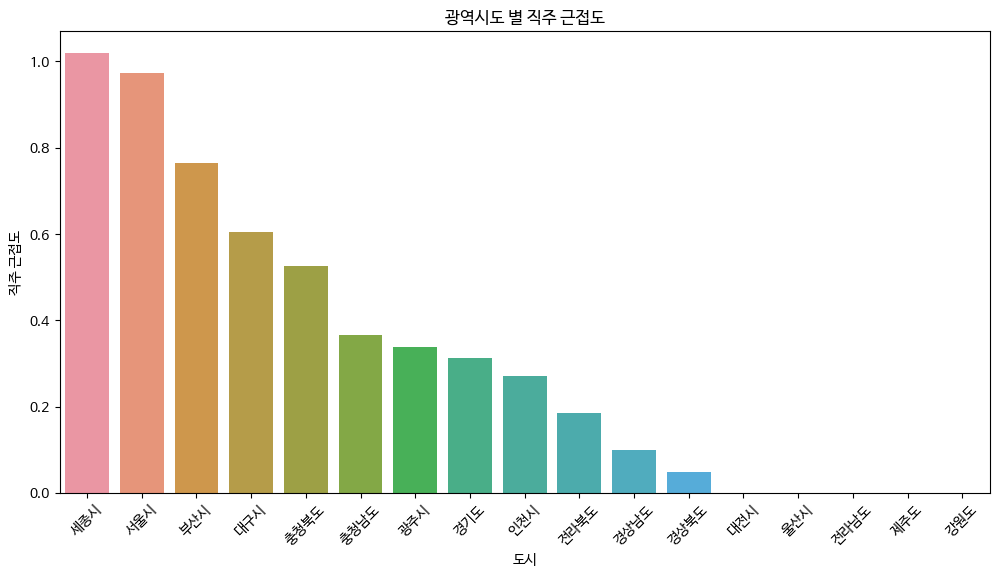

In [ ]:
avg_starbucks_by_city = df.groupby('도')['직주_근접도'].mean().sort_values(ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(x=avg_starbucks_by_city.index, y=avg_starbucks_by_city.values)
plt.title('광역시도 별 직주 근접도')
plt.xlabel('도시')
plt.ylabel('직주 근접도')
plt.xticks(rotation=45)
plt.show()

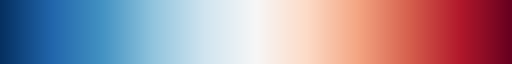

In [11]:
def color(*x): return '#'+''.join(map(lambda x: hex(int(x*255))[2:].zfill(2), x[:3]))
cmap = sns.color_palette("RdBu_r", as_cmap=True)
cmap

In [ ]:
def industry_map(df_2, zoom_start=7, tiles='cartodbpositron', apt_opacity=.5, stn_opacity=.5):
    s_map = folium.Map(location=df_2[['latitude', 'longitude']].mean(), zoom_start=zoom_start, tiles=tiles)
    avg_p, std_p = df_2['단위면적당거래금액'].median(), df_2['단위면적당거래금액'].std()
    for lat, lon, price in df_2[['latitude', 'longitude', '단위면적당거래금액']].values:
        folium.CircleMarker(
            location=(lat, lon),
            fill=True,
            radius=2,
            opacity=apt_opacity,
            color=color(*cmap(int(63+(price-avg_p)/std_p*64)))
        ).add_to(s_map)

    # 'industry' 데이터 처리
    for name, lat, lon in industry[['단지명', '위도', '경도']].values:
        folium.Circle(
            location=(lat, lon),
            radius=6000,
            color='blue',
            fill=True,
            fill_opacity=0.1,
            opacity=stn_opacity
        ).add_to(s_map)

    # 'business_1' 데이터 처리
    for name, lat, lon in business_1[['Unnamed: 1', '위도', '경도']].values:
        folium.Circle(
            location=(lat, lon),
            radius=6000,
            color='green',  # 원의 테두리 색상 변경 가능
            fill=True,
            fill_opacity=0.1,
            opacity=stn_opacity
        ).add_to(s_map)

    return s_map

industry_map(df_2, apt_opacity=.3, stn_opacity=.3)

# 인천, 광주, 천안, 부산, 대구, 사천

Output hidden; open in https://colab.research.google.com to view.

# 중심업무지구

In [ ]:
import folium

map = folium.Map(location=[37.5665, 126.9784], zoom_start=12, tiles='cartodbpositron')


for name, lat, lon in business_1[['Unnamed: 1', '위도', '경도']].values:
    folium.Circle(
        location=(lat, lon),
        radius=6000,
        color='red',
        fill=True,
        fill_opacity=0.1
    ).add_to(map)

map
# 빨강변

NameError: name 'business_1' is not defined

# 산업단지

In [ ]:
import folium

map = folium.Map(location=[37.5665, 126.9784], zoom_start=12, tiles='cartodbpositron')

for name, lat, lon in industry[['단지명', '위도', '경도']].values:
    folium.Circle(
        location=(lat, lon),
        radius=6000,
        color='Blue',
        fill=True,
        fill_opacity=0.1
    ).add_to(map)

map


In [ ]:
df_2_incheon = df_2[df_2['도'] == '인천시']

def industry_map(df_2_incheon, zoom_start=7, tiles='cartodbpositron', apt_opacity=.5, stn_opacity=.5):
    s_map = folium.Map(location=df_2_incheon[['latitude', 'longitude']].mean(), zoom_start=zoom_start, tiles=tiles)
    avg_p, std_p = df_2_incheon['단위면적당거래금액'].median(), df_2_incheon['단위면적당거래금액'].std()
    for lat, lon, price in df_2_incheon[['latitude', 'longitude', '단위면적당거래금액']].values:
        folium.CircleMarker(
            location=(lat, lon),
            fill=True,
            radius=2,
            opacity=apt_opacity,
            color=color(*cmap(int(63+(price-avg_p)/std_p*64)))
        ).add_to(s_map)

    # 'industry' 데이터 처리
    for name, lat, lon in industry[['단지명', '위도', '경도']].values:
        folium.Circle(
            location=(lat, lon),
            radius=6000,
            color='blue',
            fill=True,
            fill_opacity=0.1,
            opacity=stn_opacity
        ).add_to(s_map)

    # 'business_1' 데이터 처리
    for name, lat, lon in business_1[['Unnamed: 1', '위도', '경도']].values:
        folium.Circle(
            location=(lat, lon),
            radius=6000,
            color='green',  # 원의 테두리 색상 변경 가능
            fill=True,
            fill_opacity=0.1,
            opacity=stn_opacity
        ).add_to(s_map)

    return s_map

industry_map(df_2_incheon, apt_opacity=.3, stn_opacity=.3)
# 인천시 연수구

In [ ]:
df_2_Gwangju = df_2[df_2['도'] == '광주시']

def industry_map(df_2_Gwangju, zoom_start=7, tiles='cartodbpositron', apt_opacity=.5, stn_opacity=.5):
    s_map = folium.Map(location=df_2_Gwangju[['latitude', 'longitude']].mean(), zoom_start=zoom_start, tiles=tiles)
    avg_p, std_p = df_2_Gwangju['단위면적당거래금액'].median(), df_2_Gwangju['단위면적당거래금액'].std()
    for lat, lon, price in df_2_Gwangju[['latitude', 'longitude', '단위면적당거래금액']].values:
        folium.CircleMarker(
            location=(lat, lon),
            fill=True,
            radius=2,
            opacity=apt_opacity,
            color=color(*cmap(int(63+(price-avg_p)/std_p*64)))
        ).add_to(s_map)

    # 'industry' 데이터 처리
    for name, lat, lon in industry[['단지명', '위도', '경도']].values:
        folium.Circle(
            location=(lat, lon),
            radius=6000,
            color='blue',
            fill=True,
            fill_opacity=0.1,
            opacity=stn_opacity
        ).add_to(s_map)

    # 'business_1' 데이터 처리
    for name, lat, lon in business_1[['Unnamed: 1', '위도', '경도']].values:
        folium.Circle(
            location=(lat, lon),
            radius=6000,
            color='green',  # 원의 테두리 색상 변경 가능
            fill=True,
            fill_opacity=0.1,
            opacity=stn_opacity
        ).add_to(s_map)

    return s_map

industry_map(df_2_Gwangju, apt_opacity=.3, stn_opacity=.3)
# 광주시 서구 상무역 주변

In [ ]:
df_2_Chungcheongnam = df_2[df_2['도'] == '충청남도']

def industry_map(df_2_Chungcheongnam, zoom_start=7, tiles='cartodbpositron', apt_opacity=.5, stn_opacity=.5):
    s_map = folium.Map(location=df_2_Chungcheongnam[['latitude', 'longitude']].mean(), zoom_start=zoom_start, tiles=tiles)
    avg_p, std_p = df_2_Chungcheongnam['단위면적당거래금액'].median(), df_2_Chungcheongnam['단위면적당거래금액'].std()
    for lat, lon, price in df_2_Chungcheongnam[['latitude', 'longitude', '단위면적당거래금액']].values:
        folium.CircleMarker(
            location=(lat, lon),
            fill=True,
            radius=2,
            opacity=apt_opacity,
            color=color(*cmap(int(63+(price-avg_p)/std_p*64)))
        ).add_to(s_map)

    # 'industry' 데이터 처리
    for name, lat, lon in industry[['단지명', '위도', '경도']].values:
        folium.Circle(
            location=(lat, lon),
            radius=6000,
            color='blue',
            fill=True,
            fill_opacity=0.1,
            opacity=stn_opacity
        ).add_to(s_map)

    # 'business_1' 데이터 처리
    for name, lat, lon in business_1[['Unnamed: 1', '위도', '경도']].values:
        folium.Circle(
            location=(lat, lon),
            radius=6000,
            color='green',  # 원의 테두리 색상 변경 가능
            fill=True,
            fill_opacity=0.1,
            opacity=stn_opacity
        ).add_to(s_map)

    return s_map

industry_map(df_2_Chungcheongnam, apt_opacity=.3, stn_opacity=.3)
# 천안, 부산, 대구, 사천

In [ ]:
df_2_pusan = df_2[df_2['도'] == '부산시']

def industry_map(df_2_pusan, zoom_start=7, tiles='cartodbpositron', apt_opacity=.5, stn_opacity=.5):
    s_map = folium.Map(location=df_2_pusan[['latitude', 'longitude']].mean(), zoom_start=zoom_start, tiles=tiles)
    avg_p, std_p = df_2_pusan['단위면적당거래금액'].median(), df_2_pusan['단위면적당거래금액'].std()
    for lat, lon, price in df_2_pusan[['latitude', 'longitude', '단위면적당거래금액']].values:
        folium.CircleMarker(
            location=(lat, lon),
            fill=True,
            radius=2,
            opacity=apt_opacity,
            color=color(*cmap(int(63+(price-avg_p)/std_p*64)))
        ).add_to(s_map)

    # 'industry' 데이터 처리
    for name, lat, lon in industry[['단지명', '위도', '경도']].values:
        folium.Circle(
            location=(lat, lon),
            radius=6000,
            color='blue',
            fill=True,
            fill_opacity=0.1,
            opacity=stn_opacity
        ).add_to(s_map)

    # 'business_1' 데이터 처리
    for name, lat, lon in business_1[['Unnamed: 1', '위도', '경도']].values:
        folium.Circle(
            location=(lat, lon),
            radius=6000,
            color='green',  # 원의 테두리 색상 변경 가능
            fill=True,
            fill_opacity=0.1,
            opacity=stn_opacity
        ).add_to(s_map)

    return s_map

industry_map(df_2_pusan, apt_opacity=.3, stn_opacity=.3)
# 천안, 부산, 대구, 사천

In [ ]:
df_2_Gyeongsangnam = df_2[df_2['도'] == '경상남도']

def industry_map(df_2_Gyeongsangnam, zoom_start=7, tiles='cartodbpositron', apt_opacity=.5, stn_opacity=.5):
    s_map = folium.Map(location=df_2_Gyeongsangnam[['latitude', 'longitude']].mean(), zoom_start=zoom_start, tiles=tiles)
    avg_p, std_p = df_2_Gyeongsangnam['단위면적당거래금액'].median(), df_2_Gyeongsangnam['단위면적당거래금액'].std()
    for lat, lon, price in df_2_Gyeongsangnam[['latitude', 'longitude', '단위면적당거래금액']].values:
        folium.CircleMarker(
            location=(lat, lon),
            fill=True,
            radius=2,
            opacity=apt_opacity,
            color=color(*cmap(int(63+(price-avg_p)/std_p*64)))
        ).add_to(s_map)

    # 'industry' 데이터 처리
    for name, lat, lon in industry[['단지명', '위도', '경도']].values:
        folium.Circle(
            location=(lat, lon),
            radius=6000,
            color='blue',
            fill=True,
            fill_opacity=0.1,
            opacity=stn_opacity
        ).add_to(s_map)

    # 'business_1' 데이터 처리
    for name, lat, lon in business_1[['Unnamed: 1', '위도', '경도']].values:
        folium.Circle(
            location=(lat, lon),
            radius=6000,
            color='green',  # 원의 테두리 색상 변경 가능
            fill=True,
            fill_opacity=0.1,
            opacity=stn_opacity
        ).add_to(s_map)

    return s_map

industry_map(df_2_Gyeongsangnam, apt_opacity=.3, stn_opacity=.3)
# 천안, 부산, 대구, 사천

In [15]:
df_2_sejong = df_2[df_2['도'] == '세종시']

def industry_map(df_2_sejong, zoom_start=7, tiles='cartodbpositron', apt_opacity=.5, stn_opacity=.5):
    s_map = folium.Map(location=df_2_sejong[['latitude', 'longitude']].mean(), zoom_start=zoom_start, tiles=tiles)
    avg_p, std_p = df_2_sejong['단위면적당거래금액'].median(), df_2_sejong['단위면적당거래금액'].std()
    for lat, lon, price in df_2_sejong[['latitude', 'longitude', '단위면적당거래금액']].values:
        folium.CircleMarker(
            location=(lat, lon),
            fill=True,
            radius=2,
            opacity=apt_opacity,
            color=color(*cmap(int(128+(price-avg_p)/std_p*96)))
        ).add_to(s_map)

    # 'industry' 데이터 처리
    for name, lat, lon in industry[['단지명', '위도', '경도']].values:
        folium.Circle(
            location=(lat, lon),
            radius=6000,
            color='blue',
            fill=True,
            fill_opacity=0.1,
            opacity=stn_opacity
        ).add_to(s_map)

    # 'business_1' 데이터 처리
    for name, lat, lon in business_1[['Unnamed: 1', '위도', '경도']].values:
        folium.Circle(
            location=(lat, lon),
            radius=6000,
            color='green',  # 원의 테두리 색상 변경 가능
            fill=True,
            fill_opacity=0.1,
            opacity=stn_opacity
        ).add_to(s_map)

    return s_map

industry_map(df_2_sejong, apt_opacity=.7, stn_opacity=.3)
# 천안, 부산, 대구, 사천